Use pima_Indian_Diabetes dataset  and perform the following:

Use preprocessing methods to clean the dataset.

Spit the dataset into Train and Test dataset, respectively.

Visualize your training data to know whether the relationship between dependent and independent variable is linear.

Use train dataset to create a decision tree model.

Use test dataset for predictions.

Access the accuracy of your model.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing pima-indian-diabetes
diabetes_df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/pima-indians-diabetes.csv',header=None)

In [3]:
#adding column labels to dataset
diabetes_df.columns=['pregnancies','glucose','bloodpressure','skin_thickness','insulin','bmi','diabetes_pedigree','age','outcome']
feature_columns=['pregnancies','glucose','bloodpressure','skin_thickness','insulin','bmi','diabetes_pedigree','age']

In [4]:
diabetes_df.head()

,pregnancies,glucose,bloodpressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#checking for null values in the dataset
diabetes_df.isnull().sum()

pregnancies          0
glucose              0
bloodpressure        0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64

In [6]:
#extracting features and target dataframe from the dataset
features_df=diabetes_df.iloc[:,0:8].values
target_df=diabetes_df.iloc[:,8].values

In [7]:
#standardizing features dataframe 
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
features_df=norm.fit_transform(features_df)

In [8]:
features_df.shape

(768, 8)

In [9]:
target_df.shape

(768,)

In [10]:
#splitting dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(features_df,target_df,test_size=0.3,random_state=10)

Visualizing independent and dependent variables using scatterplots

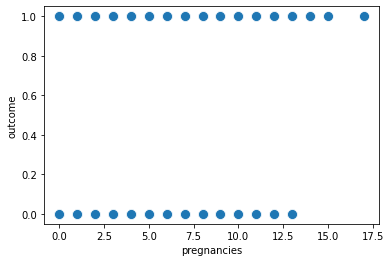

In [11]:
sns.scatterplot(x='pregnancies',y='outcome',data=diabetes_df,s=100)

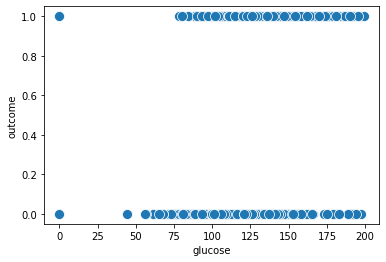

In [12]:
sns.scatterplot(x='glucose',y='outcome',data=diabetes_df,s=100)

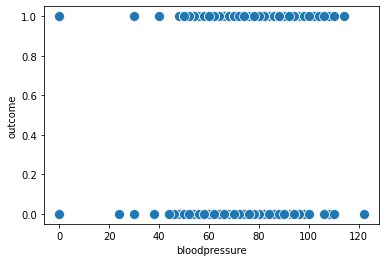

In [13]:
sns.scatterplot(x='bloodpressure',y='outcome',data=diabetes_df,s=100)

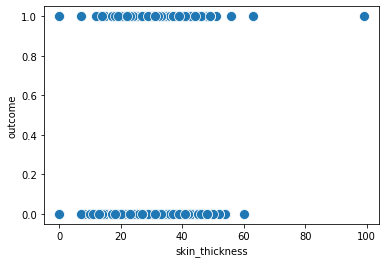

In [14]:
sns.scatterplot(x='skin_thickness',y='outcome',data=diabetes_df,s=100)

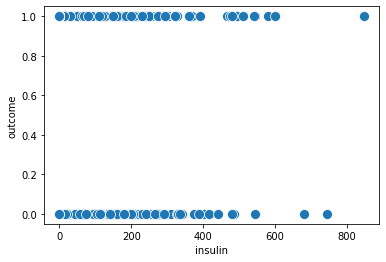

In [15]:
sns.scatterplot(x='insulin',y='outcome',data=diabetes_df,s=100)

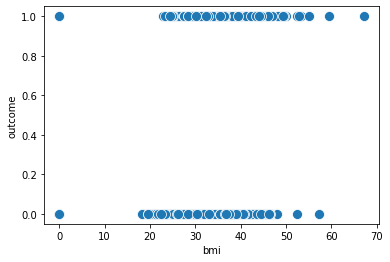

In [16]:
sns.scatterplot(x='bmi',y='outcome',data=diabetes_df,s=100)

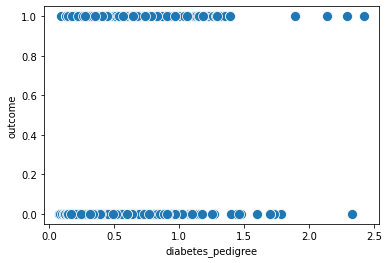

In [17]:
sns.scatterplot(x='diabetes_pedigree',y='outcome',data=diabetes_df,s=100)

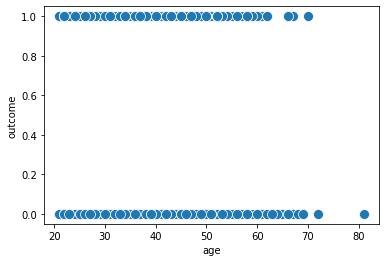

In [18]:
sns.scatterplot(x='age',y='outcome',data=diabetes_df,s=100)

In [19]:
#using training set to create a decision tree model
diabetes_tree=DecisionTreeClassifier(criterion="gini",random_state=10)
diabetes_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [20]:
#predicting y values using testing set
y_pred=diabetes_tree.predict(X_test)

In [21]:
#calculating accuracy score of the model
acc=accuracy_score(y_test,y_pred)*100
print( "Accuracy of decision tree classifier is ",round(acc,4))

Accuracy of decision tree classifier is  71.4286


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


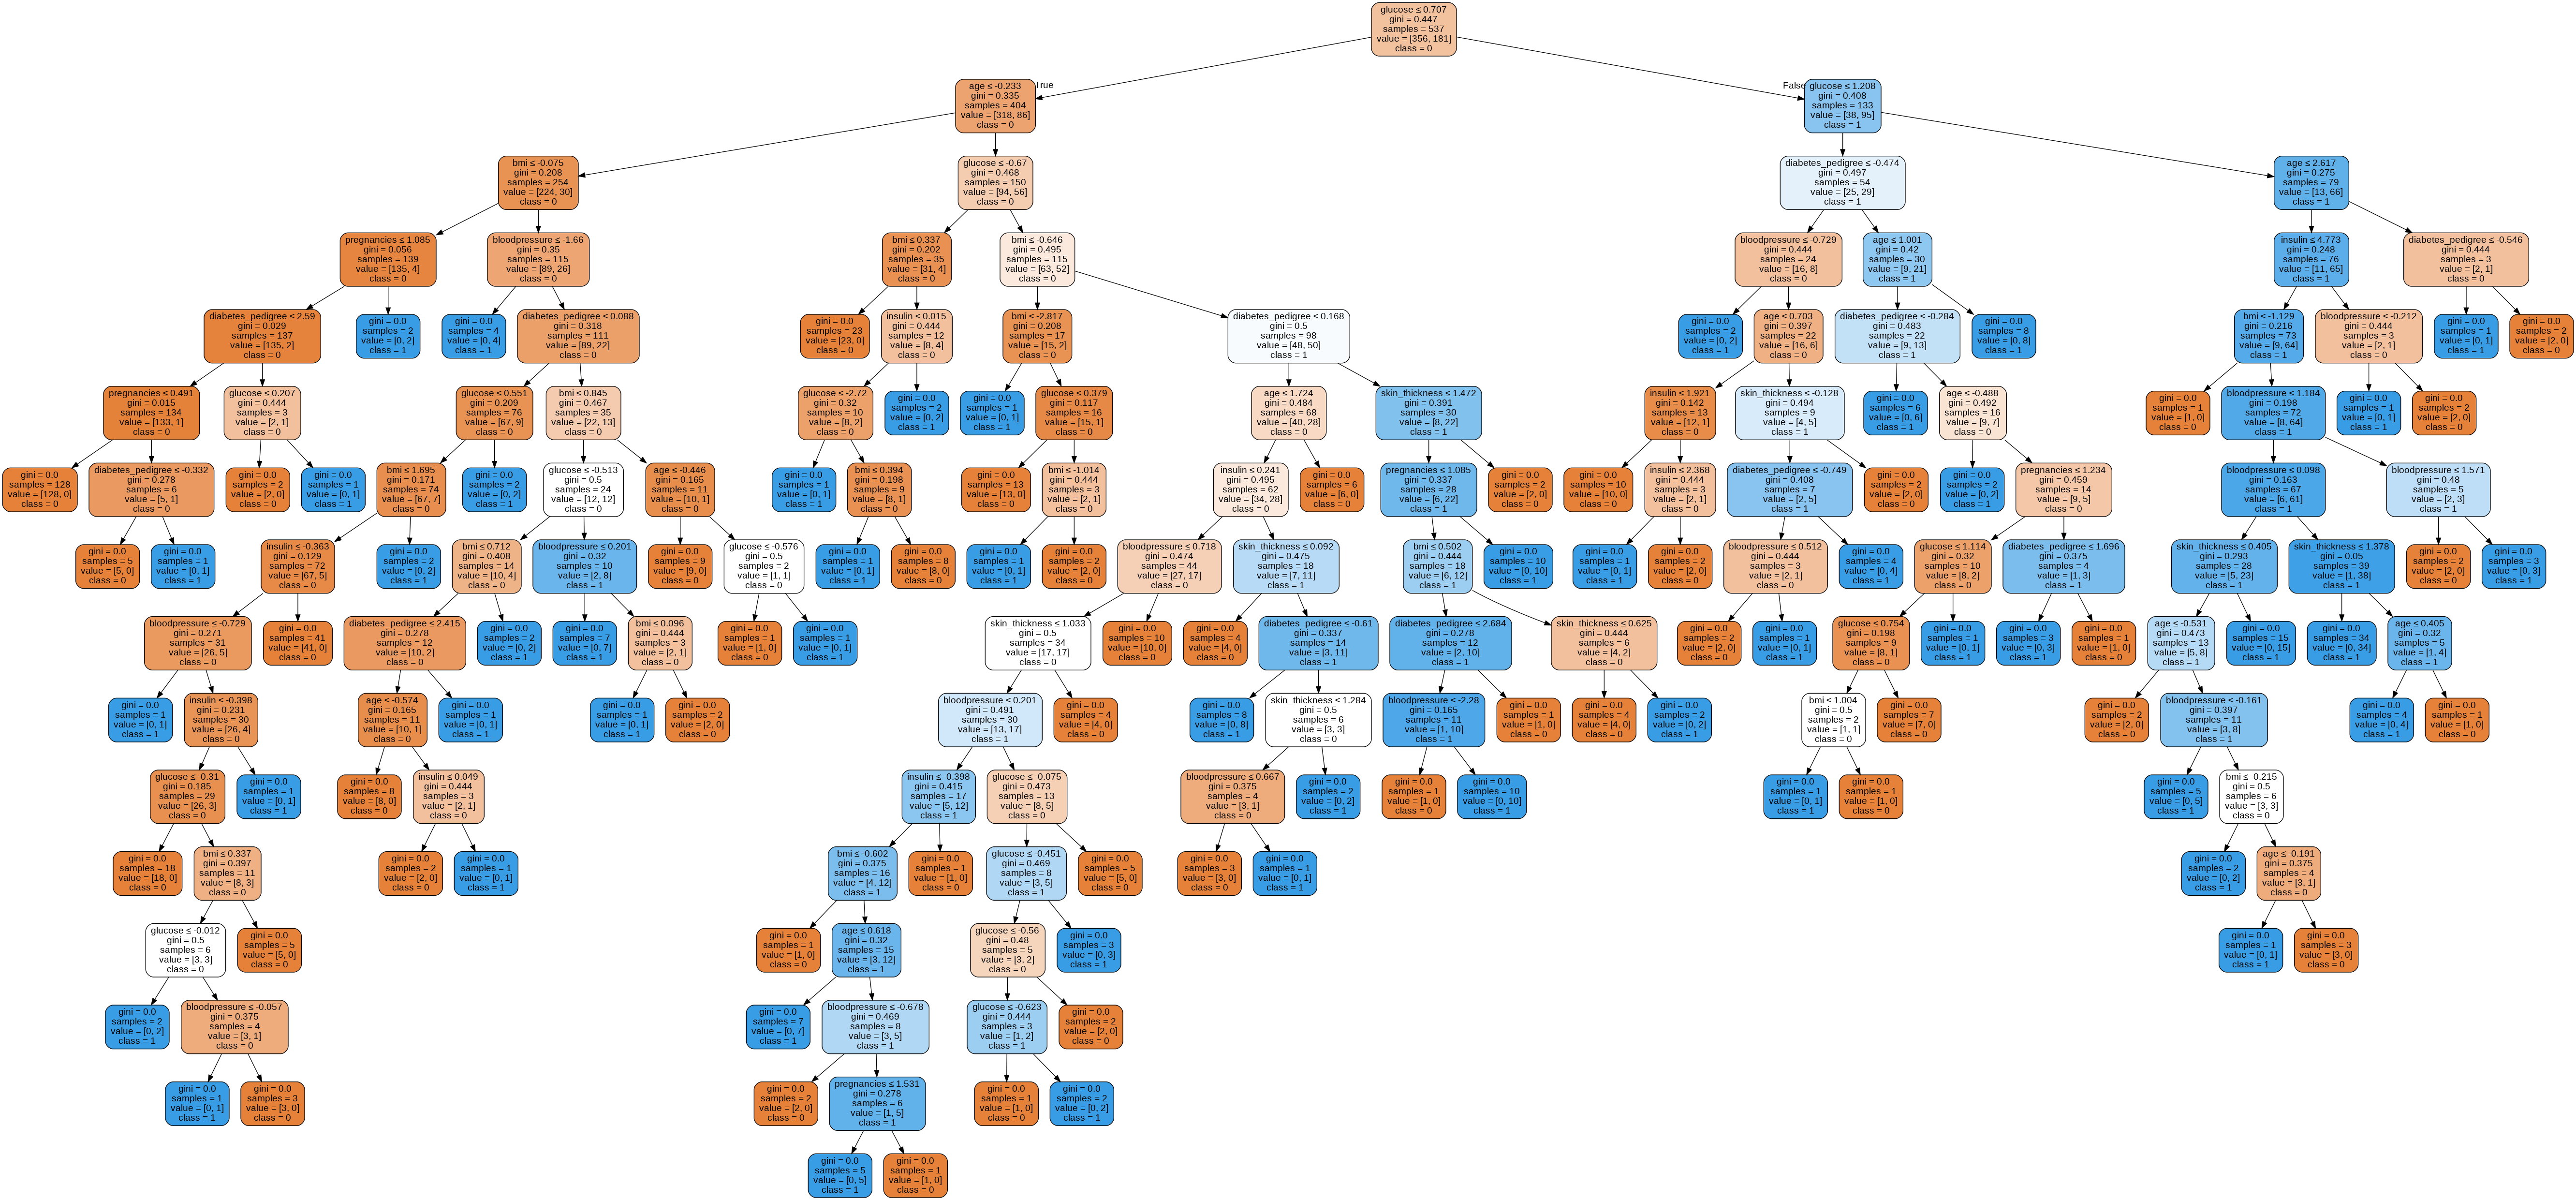

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data=StringIO()
export_graphviz(diabetes_tree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('DiabetesTree.png')
Image(graph.create_png())